# Lecture 7:   Model Selection in Bayesian Framework
  
   #### Reference: Ivezic Chapter 5.4 & 5.7,  uw_astr-324 notebook
   
   **Yuantian Liu, Mon, Sep 18** 


## Review Bayesian Statistical Inference


In Bayesian inference, we evaluate the **posterior probability** by using
** data likelihood** and **prior** information: 
 
$$p(M,\theta \,|\,D,I) = \frac{p(D\,|\,M,\theta,I)\,p(M,\theta\,|\,I)}{p(D\,|\,I)},$$

The prior can be expanded as 
$$p(M,\theta\,|\,I) = p(\theta\,|\,M,I)\,p(M\,|\,I).$$
 
It is often the case that $p(D\,|\,I)$ is not evaluated explictly since the posterior probability 
can be (re)normalized. 

**The Bayesian Statistical Inference process** is then
* formulate the likelihood, $p(D\,|\,M,\theta,I)$
* chose a prior $p(M,\theta\,|\,I)$, which incorporates *other information beyond the data in $D$*
* determine the posterior pdf, $p(M,\theta \,|\,D,I)$
* search for the model parameters that maximize $p(M,\theta \,|\,D,I)$ 
* quantify the uncertainty of the model parameter estimates
 
 
The above procedure is valid for a given model $M$. For example, we can fit a straight
line to data $\{x_i,y_i\}$. 

**What if we have a competing model?**

For example, how do we know that we should fit a straight line to our data and not, perhaps, 
a parabola, or y=sin(x), etc? 



CHI2:
  best linear model: 11.3241283783
  best quadratic model: 9.46283521857
  best cubic model: 8.99360837039
CHI2 per degree of freedom:
  best linear model: 0.629118243242
  best quadratic model: 0.556637365798
  best cubic model: 0.562100523149


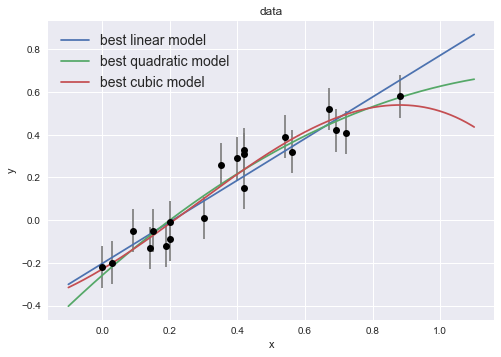

In [12]:
## Credit to: Jake VanderPlas
## http://jakevdp.github.io/blog/2015/08/07/frequentism-and-bayesianism-5-model-selection/

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # set default plot styles
from scipy import stats
from scipy import optimize

# generate (x,y, sigma_y) "data" 
data = np.array([[ 0.42,  0.72,  0.  ,  0.3 ,  0.15,
                   0.09,  0.19,  0.35,  0.4 ,  0.54,
                   0.42,  0.69,  0.2 ,  0.88,  0.03,
                   0.67,  0.42,  0.56,  0.14,  0.2  ],
                 [ 0.33,  0.41, -0.22,  0.01, -0.05,
                  -0.05, -0.12,  0.26,  0.29,  0.39, 
                   0.31,  0.42, -0.01,  0.58, -0.2 ,
                   0.52,  0.15,  0.32, -0.13, -0.09 ],
                 [ 0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1  ]])
x, y, sigma_y = data
Ndata = x.size


# this function computes polynomial models given some data x
# and parameters theta
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    return sum(t * x ** n for (n, t) in enumerate(theta))

# compute the data log-likelihood given a model
def logL(theta, model=polynomial_fit, data=data):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(stats.norm.logpdf(*args)
               for args in zip(y, y_fit, sigma_y))

# a direct optimization approach is used to get best model 
# parameters (which minimize -logL)
def best_theta(degree, model=polynomial_fit, data=data):
    theta_0 = (degree + 1) * [0]
    neg_logL = lambda theta: -logL(theta, model, data)
    return optimize.fmin_bfgs(neg_logL, theta_0, disp=False)

# get best-fit parameters for linear, quadratic and cubic models
theta1 = best_theta(1)
theta2 = best_theta(2)
theta3 = best_theta(3)
# generate best fit lines on a fine grid 
xfit = np.linspace(-0.1, 1.1, 1000)
yfit1 = polynomial_fit(theta1, xfit)
yfit2 = polynomial_fit(theta2, xfit)
yfit3 = polynomial_fit(theta3, xfit)
# and compute chi2 per degree of freedom: sum{[(y-yfit)/sigma_y]^2} 
chi21 = np.sum(((y-polynomial_fit(theta1, x))/sigma_y)**2) 
chi22 = np.sum(((y-polynomial_fit(theta2, x))/sigma_y)**2) 
chi23 = np.sum(((y-polynomial_fit(theta3, x))/sigma_y)**2) 
# the number of fitted parameters is 2, 3, 4
chi2dof1 = chi21/(Ndata - 2)
chi2dof2 = chi22/(Ndata - 3)
chi2dof3 = chi23/(Ndata - 4)

print "CHI2:"
print '  best linear model:', chi21
print '  best quadratic model:', chi22
print '  best cubic model:', chi23
print "CHI2 per degree of freedom:"
print '  best linear model:', chi2dof1
print '  best quadratic model:', chi2dof2
print '  best cubic model:', chi2dof3

# plot 
fig, ax = plt.subplots()
ax.errorbar(x, y, sigma_y, fmt='ok', ecolor='gray')
ax.plot(xfit, polynomial_fit(theta1, xfit), label='best linear model')
ax.plot(xfit, polynomial_fit(theta2, xfit), label='best quadratic model')
ax.plot(xfit, polynomial_fit(theta3, xfit), label='best cubic model')
ax.legend(loc='best', fontsize=14)
ax.set(xlabel='x', ylabel='y', title='data');

$\chi^2$ per degree of freedom was computed as 
$$ \chi^2_{dof}  = \frac{1}{N-k} \sum_i^N \left( \frac{y - y_{fit}}{\sigma_y} \right)^2, $$
where $N$ is the number of data points and $k$ is the number of free model parameters (2, 3, and 4). 

The values of $\chi^2$ per degre of freedom for the three models are: 

best linear model: 0.629 

best quadratic model: 0.557

best cubic model: 0.562 


**Which model should we adopt?**

Obviously, the cubic model has the lowest $\chi2$ ("fits the best"), but 
it has 4 free parameters while the linear model has only 2 free parameters.

**How do we trade improvement in $\chi^2$ with increasing model
complexity? **

**Occam’s razor:** select the simplest model that is in fair agreement with the data.


## Bayesian Model Comparison


Up to now we have concerned ourselves with determining the optimal parameters of a given model fit.  But what if *another* model would be a better fit (regardless of how you choose the parameters of the first model). Bayes's theorem as introduced by:

$$p(M,\theta \,|\,D,I) = \frac{p(D\,|\,M,\theta,I)\,p(M,\theta\,|\,I)}{p(D\,|\,I)},$$    '

(Eq 5.22) quantifying the posrerior pdf of parameters describing a single model, with that model assumed to be true. However, in model selection and hypothesis testing, we formulate alternative scenarios and ask which ones are best support by the available data.

Marginalize over model parameter space $\theta$
to obtain **the probability of model $M$** given the data $D$ and prior information $I$:

$$p(M\,|\,D,I) \equiv \int p(M,\theta \,|\,D,I) \, d\theta = 
      \int \frac{p(D\,|\,M,\theta,I)\,p(M,\theta\,|\,I)}{p(D\,|\,I)} \, d\theta =
      \frac{p(M\,|\,I)}{p(D\,|\,I)} \int p(D\,|\,M,\theta,I)\,p(\theta\,|\,M,I) \, d\theta  $$
 
To determine which model is better we compute the ratio of the posterior probabilities or the **odds ratio** for two models as
$$O_{21} \equiv \frac{p(M_2|D,I)}{p(M_1|D,I)}.$$

The posterior probability that the model $M$ is correct given data $D$ (a number between 0 and 1) is
$$p(M|D,I) = \frac{p(D|M,I)p(M|I)}{p(D|I)},$$
the odds ratio can ignore $p(D|I)$ since it  will be the same for both models.  

(We'll see later why that is even more important than you might think as the denominator is the integral of the numerator, but what if you don't have an analytical function that you can integrate?)

We get 
$$O_{21} = \frac{p(D\,|\,M_2,I)\,p(M_2\,|\,I)}{p(D\,|\,M_1,I)\,p(M_1\,|\,I)} \equiv B_{21} \, \frac{p(M_2\,|\,I)}{p(M_1\,|\,I)},$$   (Eq 5.24) 

,where $B_{21}$ is called the Bayes factor. 

The Bayes factor compares how well the models fit the data: it is a ratio of data likelihoods averaged over 
all allowed values of the model parameters; if two models fit the data equally well, the "winner" is decided based on priors. 

For example, consider a noisy image of a source which is equally likely to be a star or a galaxy. 
The posterior probability that the source is a star will greatly depend on whether we are looking 
at the Galactic plane or not. 


We can compute 
$$ E(M) \equiv p(D\,|\,M, I) = \int p(D\,|\,M, \theta, I) \, p(\theta\,|\,M, I) \, d\theta $$  (Eq 5.23) 

,where $E(M)$ is called **the marginal likelihood for model $M$** and it quantifies the probability that the 
data $D$ would be observed if the model $M$ were the correct model. 

In the physics literature, the marginal likelihood $E(M)$ is often called **evidence** (despite the fact that to 
scientists, evidence and data mean essentially the same thing). 
Since the evidence $E(M)$ involves integration of the data likelihood $p(D|M,\theta,I)$, it is also 
called **the global likelihood for model M**. The global likelihood, or evidence, is a weighted average 
of the likelihood function, with the prior for model parameters acting as the weighting function.

**How do we interpret the values of the odds ratio in practice?**

Jeffreys proposed a five-step scale for 
interpreting the odds ratio, where $O_{21} > 10$ represents “strong” evidence in favor of $M_2$ ($M_2$ 
is ten times more probable than $M_1$), and $O_{21} > 100$ is “decisive” evidence ($M_2$ is one hundred 
times more probable than $M_1$). When $O_{21} < 3$, the evidence is “not worth more than a bare mention.”

### Bayesian Hypothesis Testing

In *hypothesis testing* we are essentially comparing a model, $M_1$, to its complement.  That is $p(M_1) + p(M_2) = 1$.  If we take $M_1$ to be the "null" (default) hypothesis (which is generally that, for example, a correlation does *not* exist), then we are asking whether or not the data reject the null hypothesis.

In classical hypothesis testing we can ask whether or not a single model provides a good description of the data.  

** In Bayesian hypothesis testing, we must have an alternative comparison model! **



### Example #1: Coin toss.

We consider two hypothesis; $M_1$ the coin has known heads probability $b_*$, and $M_2$ has unknown heads probability $b$, with a uniform prior in the range 0-1. Let's assume we flipped the coin $N$ times, and obtained $k$ heads. Using the binomial distrubution equation, the odds ratio is given by:

$$O_{21}=\int^{1}_{0}(\frac{b}{b_*})^k (\frac{1-b}{1-b_*})^{N-k}db$$

(Eq 5.26)

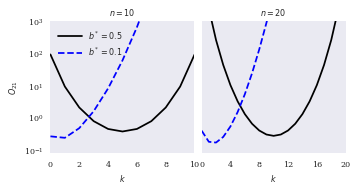

In [18]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)


@np.vectorize
def odds_ratio(n, k, bstar):
    """Odds ratio between M_2, where the heads probability is unknown,
    and M_1, where the heads probability is known to be `bstar`, evaluated
    in the case of `k` heads observed in `n` tosses.

    Eqn. 5.25 in the text
    """
    factor = 1. / (bstar ** k * (1 - bstar) ** (n - k))
    f = lambda b: b ** k * (1 - b) ** (n - k)

    return factor * integrate.quad(f, 0, 1)[0]

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(left=0.13, right=0.95, wspace=0.05, bottom=0.15)

subplots = [121, 122]
n_array = [10, 20]

linestyles = ['-k', '--b']
bstar_array = [0.5, 0.1]

for subplot, n in zip(subplots, n_array):
    ax = fig.add_subplot(subplot, yscale='log')
    k = np.arange(n + 1)

    # plot curves for two values of bstar
    for ls, bstar in zip(linestyles, bstar_array):
        ax.plot(k, odds_ratio(n, k, bstar), ls,
                label=r'$b^* = %.1f$' % bstar)

    if subplot == 121:
        ax.set_xlim(0, n - 0.01)
        ax.set_ylabel(r'$O_{21}$')
        ax.legend(loc=2)
    else:
        ax.set_xlim(0, n)
        ax.yaxis.set_major_formatter(plt.NullFormatter())

    ax.set_xlabel('$k$')
    ax.set_title('$n = %i$' % n)
    ax.set_ylim(8E-2, 1E3)
    ax.xaxis.set_major_locator(plt.MultipleLocator(n / 5))
    ax.grid()


plt.show()

Odds ratio approximation: 
$$O_{21}\simeq \sqrt{2 \pi}{\sigma_b}(\frac{b_0}{b_*})^k (\frac{1-b_0}{1-b_*})^{N-k}db$$ (Eq 5.34) 

We can see that the evidence in favor of model $M_2$ decreases (penalized) proportional to the posterior pdf width of its free parameter. If indeed $b_0 \simeq b_*$, model $M_1$ wins because it explaned the data without any free parameter. On the other hand, the evidence in favor of $M_2$ increases as the data_based value $b_0$ becomes very different from the prior claim $b_*$ by model $M_1$. Model $M_1$ becomes disfavored because it is unable to explain the observed data.



### Example #2: Cauchy or Gaussian.

The following plot from the last time shows the data likelihood $p(D|M, \theta, I)$ for a sample drawn
from Gaussian distribution. The best $\mu$ and $\sigma$ are found as the maximum of this distribution. 
The marginal likelihood for model $M=Gauss$ is found by **integrating** this image over $\mu$ and $\sigma$.

If we think that the sample might have been drawn from some other distribution, we can produce an analogous
$p(D|M, \theta, I)$, say for $M=Cauchy$.
Integrate it and compute the Bayes factor and the models odds
ratio (with models assigned equal prior probabilities unless there is a reason that one model is more 
likely than another. 

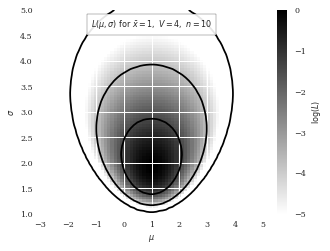

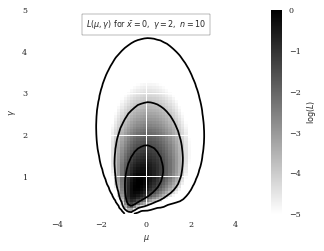

In [19]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from astroML.plotting.mcmc import convert_to_stdev

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)


def gauss_logL(xbar, V, n, sigma, mu):
    """Equation 5.57: gaussian likelihood"""
    return (-(n + 1) * np.log(sigma)
            - 0.5 * n * ((xbar - mu) ** 2 + V) / sigma ** 2)

#------------------------------------------------------------
# Define the grid and compute logL
sigma = np.linspace(1, 5, 70)
mu = np.linspace(-3, 5, 70)
xbar = 1
V = 4
n = 10

logL = gauss_logL(xbar, V, n, sigma[:, np.newaxis], mu)
logL -= logL.max()

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 3.75))
plt.imshow(logL, origin='lower',
           extent=(mu[0], mu[-1], sigma[0], sigma[-1]),
           cmap=plt.cm.binary,
           aspect='auto')
plt.colorbar().set_label(r'$\log(L)$')
plt.clim(-5, 0)

plt.contour(mu, sigma, convert_to_stdev(logL),
            levels=(0.683, 0.955, 0.997),
            colors='k')

plt.text(0.5, 0.93, r'$L(\mu,\sigma)\ \mathrm{for}\ \bar{x}=1,\ V=4,\ n=10$',
         bbox=dict(ec='k', fc='w', alpha=0.9),
         ha='center', va='center', transform=plt.gca().transAxes)

plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')

plt.show()

import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import cauchy
from astroML.plotting.mcmc import convert_to_stdev
from astroML.stats import median_sigmaG

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)


def cauchy_logL(xi, gamma, mu):
    """Equation 5.74: cauchy likelihood"""
    xi = np.asarray(xi)
    n = xi.size
    shape = np.broadcast(gamma, mu).shape

    xi = xi.reshape(xi.shape + tuple([1 for s in shape]))

    return ((n - 1) * np.log(gamma)
            - np.sum(np.log(gamma ** 2 + (xi - mu) ** 2), 0))


#------------------------------------------------------------
# Define the grid and compute logL
gamma = np.linspace(0.1, 5, 70)
mu = np.linspace(-5, 5, 70)

np.random.seed(44)
mu0 = 0
gamma0 = 2
xi = cauchy(mu0, gamma0).rvs(10)

logL = cauchy_logL(xi, gamma[:, np.newaxis], mu)
logL -= logL.max()

#------------------------------------------------------------
# Find the max and print some information
i, j = np.where(logL >= np.max(logL))


#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 3.75))
plt.imshow(logL, origin='lower', cmap=plt.cm.binary,
           extent=(mu[0], mu[-1], gamma[0], gamma[-1]),
           aspect='auto')
plt.colorbar().set_label(r'$\log(L)$')
plt.clim(-5, 0)

plt.contour(mu, gamma, convert_to_stdev(logL),
            levels=(0.683, 0.955, 0.997),
            colors='k')

plt.text(0.5, 0.93,
         r'$L(\mu,\gamma)\ \mathrm{for}\ \bar{x}=0,\ \gamma=2,\ n=10$',
         bbox=dict(ec='k', fc='w', alpha=0.9),
         ha='center', va='center', transform=plt.gca().transAxes)

plt.xlabel(r'$\mu$')
plt.ylabel(r'$\gamma$')

plt.show()


Results for first 10 points:
  L(M = Cauchy) = 1.18e-12 +/- 5.39e-16
  L(M = Gauss)  = 8.09e-13 +/- 7.45e-16
  O_{CG} = 1.45 +/- 0.00134


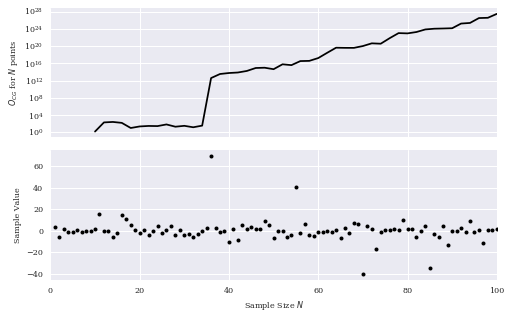

In [20]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import cauchy, norm
from scipy import integrate

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)


def logL_cauchy(xi, gamma, mu,
                mu_min=-10, mu_max=10, sigma_min=0.01, sigma_max=100):
    """Equation 5.74: cauchy likelihood"""
    xi = np.asarray(xi)
    n = xi.size
    shape = np.broadcast(gamma, mu).shape

    xi = xi.reshape(xi.shape + tuple([1 for s in shape]))

    prior_normalization = - (np.log(mu_max - mu_min)
                             + np.log(np.log(sigma_max / sigma_min)))

    return (prior_normalization
            - n * np.log(np.pi)
            + (n - 1) * np.log(gamma)
            - np.sum(np.log(gamma ** 2 + (xi - mu) ** 2), 0))


def logL_gaussian(xi, sigma, mu,
                  mu_min=-10, mu_max=10, sigma_min=0.01, sigma_max=100):
    """Equation 5.57: gaussian likelihood"""
    xi = np.asarray(xi)
    n = xi.size
    shape = np.broadcast(sigma, mu).shape

    xi = xi.reshape(xi.shape + tuple([1 for s in shape]))

    prior_normalization = - (np.log(mu_max - mu_min)
                             + np.log(np.log(sigma_max / sigma_min)))

    return (prior_normalization
            - 0.5 * n * np.log(2 * np.pi)
            - (n + 1) * np.log(sigma)
            - np.sum(0.5 * ((xi - mu) / sigma) ** 2, 0))


def calculate_odds_ratio(xi, epsrel=1E-8, epsabs=1E-15):
    """
    Compute the odds ratio by perfoming a double integral
    over the likelihood space.
    """
    gauss_Ifunc = lambda mu, sigma: np.exp(logL_gaussian(xi, mu, sigma))
    cauchy_Ifunc = lambda mu, gamma: np.exp(logL_cauchy(xi, mu, gamma))

    I_gauss, err_gauss = integrate.dblquad(gauss_Ifunc, -np.inf, np.inf,
                                           lambda x: 0, lambda x: np.inf,
                                           epsabs=epsabs, epsrel=epsrel)
    I_cauchy, err_cauchy = integrate.dblquad(cauchy_Ifunc, -np.inf, np.inf,
                                             lambda x: 0, lambda x: np.inf,
                                             epsabs=epsabs, epsrel=epsrel)

    if I_gauss == 0:
        O_CG = np.inf
        err_O_CG = np.inf
    else:
        O_CG = I_cauchy / I_gauss
        err_O_CG = O_CG * np.sqrt((err_gauss / I_gauss) ** 2)

    return (I_gauss, err_gauss), (I_cauchy, err_cauchy), (O_CG, err_O_CG)


#------------------------------------------------------------
# Draw points from a Cauchy distribution
np.random.seed(44)
mu = 0
gamma = 2
xi = cauchy(mu, gamma).rvs(100)

#------------------------------------------------------------
# compute the odds ratio for the first 10 points
((I_gauss, err_gauss),
 (I_cauchy, err_cauchy),
 (O_CG, err_O_CG)) = calculate_odds_ratio(xi[:10])

print "Results for first 10 points:"
print "  L(M = Cauchy) = %.2e +/- %.2e" % (I_cauchy, err_cauchy)
print "  L(M = Gauss)  = %.2e +/- %.2e" % (I_gauss, err_gauss)
print "  O_{CG} = %.3g +/- %.3g" % (O_CG, err_O_CG)

#------------------------------------------------------------
# calculate the results as a function of number of points
Nrange = np.arange(10, 101, 2)
Odds = np.zeros(Nrange.shape)
for i, N in enumerate(Nrange):
    res = calculate_odds_ratio(xi[:N])
    Odds[i] = res[2][0]

#------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(8, 5))
fig.subplots_adjust(hspace=0.1)

ax1 = fig.add_subplot(211, yscale='log')
ax1.plot(Nrange, Odds, '-k')
ax1.set_ylabel(r'$O_{CG}$ for $N$ points')
ax1.set_xlim(0, 100)
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.yaxis.set_major_locator(plt.LogLocator(base=10000.0))

ax2 = fig.add_subplot(212)
ax2.scatter(np.arange(1, len(xi) + 1), xi, lw=0, s=16, c='k')
ax2.set_xlim(0, 100)
ax2.set_xlabel('Sample Size $N$')
ax2.set_ylabel('Sample Value')

plt.show()

The odds ratio for the first 10 points is very close to unity ($O_{CG} = 1.45$) and 
is therefore inconclusive.
 
Why do we get an inconclusive odds ratio? With only 10 points, the probability of 
drawing at least one point far away from the mean, which would strongly argue against 
the Gaussian model, is fairly small. As the number of data values is increased, the 
ability to discriminate between the models increases, too. As the above figure shows,
when we increase the size of the observed sample, the odds ratio quickly favors the 
Cauchy over the Gaussian model.

Going back to our polynomial example, we could use the same method and 
integrate (marginalize) the posterior over model parameter space $\theta$.
However, the data likelihood in that example can become cumbersome to track
(for the cubic fit, it's a 4-dimensional space to integrate) and it's much
easier to compare the fits using numerical methods such as Markov Chain
Monte Carlo (MCMC).

### Information Criteria

We can always increase the number of parameters in our model and improve the fit.  
So we need some kind of "scoring" system that accounts for the complexity of the 
model and penalizes models that are too complex (given the data): this principle
of selecting the simplest model that is in fair agreement with the data is known 
as Occam’s razor. 

Hidden in the above expression for the odds ratio is its ability to penalize complex 
models with many free parameters; that is, Occam’s razor is naturally included into 
the Bayesian model comparison! 

A common scoring system is the **Bayesian information criterion (BIC)**. It can 
be derived from the model odds ratio by assuming that the data likelihood is 
Gaussian (see \S5.4.2 in textbook for details). The BIC is easier to compute 
than the model odds ratio because it is based on the maximum value of the data 
likelihood, $L_0(M)$, rather than on the integration of the data likelihood over 
the full parameter space (i.e. evidence $E(M)$). For $N$ data points and a model 
with $k$ parameters,
$${\rm BIC} \equiv -2 \ln [L_0(M)] + k \ln N.$$ 
(Eq 5.35), where the 1st term is equal to model's $\chi^2$ (under the assumption of normality;
note that this is not $\chi^2$ per degree of freedom!)
and the 2nd term on the RHS penalizes complex models relative to simple ones.

Another well-known scoring system, which can be derived using information theory 
is the **Aikake information criterion (AIC)**,  computed as
$${\rm AIC} \equiv -2 \ln [L_0(M)] + 2k + \frac{2k(k+1)}{N-k-1}.$$

(Eq 4.17) AIC is a popular simple approach based on an asymptotic approximation. When two models are compared, their BIC (or AIC) are compared analogously to the 
odds ratio, that is, the model with the smaller value wins. If the models are 
equally successful in describing the data (i.e., they have the same value of $L_0(M)$), 
then the model with fewer free parameters wins. 

Both the BIC and AIC are approximations and might not be valid if the underlying 
assumptions are not met. Furthermore, unlike the odds ratio, both of them penalize 
unconstrained parameters. In general, it is better to compute the odds ratio when 
computationally feasible. 

### Example #3: Linear vs. Quadratic vs. Cubic.
Let's use BIC to choose the best polynomial from the earlier line fitting example. 
Starting with
$${\rm BIC} = \chi^2 + k \ln N,$$ 
with $N=20$ we have:

<pre>
     model    chi^2    k   k*ln(N)   BIC       
    linear    11.32    2    5.99    17.31   
  quadratic    9.46    3    8.99    18.45   
     cubic     8.99    4   11.98    20.97  
</pre>

Therefore, the improvement in $\chi^2$ for the quadratic model, relative 
to the linear model, ** is not large enough to justify another free model
parameter.** 


Another useful method for model selection is the **cross-validation method**.
Its disadvantage is that it may be computationally intensive for complex
problems, but its great advantage is that it is conceptually simple and
easy to implement. The basic idea of 
the cross-validation method is not to use a fraction of the sample when
obtaining the best-fit parameters and then compute the goodness-of-fit 
(e.g. $\chi^2$, but any metric can be implemented) with this unused subsample. 
The "leave-one-out" implementation repeats model fitting $N$ times, using
$N-1$ data points. Each time the missing point is used to compute the 
goodness-of-fit, and the $N$ values are averaged. 

When the model is too simple, it will have high bias (under-fitting)
and when the model is too complex, the variance will be high (over-fitting).

### Knuth's Histograms 

Details are in Izevic 5.7.2

**Scott's Rule** (Eq 4.78): $$ \Delta_b = \frac{3.5\sigma}{N^{1/3}}$$

**Freed-Diac Rule** (Eq 4.79): $$ \Delta_b =  \frac{2.7\sigma_G}{N^{1/3}}$$

The Scott’s rule and the Freedman–Diaconis rule for estimating optimal bin width produce the same answer for multimodal and unimodal distributions as long as their data set size and scale parameter are the same.
This undesired result is avoided when using a method developed by Knuth. 

Knuth shows that the best piecewise constant model has the number of bins, $M$, which maximizes the following function:

$$F(M|\{x_i\},I)=NlogM+log[ \Gamma(\frac{M}{2}) ]-Mlog[ \Gamma(\frac{1}{2}) ]-log[ \Gamma(N+\frac{M}{2}) ]+
\displaystyle\sum_{k=1}^{N}log[ \Gamma(n_k+\frac{1}{2}) ]$$  (Eq 5.107)

where $\Gamma$ is the gamma function, and $n_k$ is the number of measurements $x_i$, $i=1,2,...,N$, which are found in bin $k$, where $k=1,2,...,M$.


Knuth derived the equation 5.107 using Baysian model selection and treating the histogram as a piecewise constant model of the underlying density function. By assumption, the bin width is constant and the number of the binsis the result of model selection. 

Optimal bin width for Knuth's with $N$ up to $10^6$ (Eq 5.112): $$ \Delta_b =  \frac{2.7\sigma_G}{N^{1/4}}$$

### Example 4: Scott vs. Freed-Diac vs. Knuth.

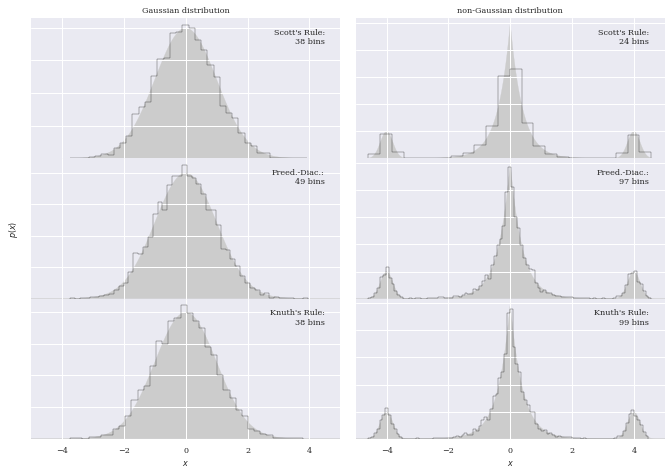

In [21]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from astroML.plotting import hist

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)


def plot_labeled_histogram(style, data, name,
                           x, pdf_true, ax=None,
                           hide_x=False,
                           hide_y=False):
    if ax is not None:
        ax = plt.axes(ax)

    counts, bins, patches = hist(data, bins=style, ax=ax,
                                 color='k', histtype='step', normed=True)
    ax.text(0.95, 0.93, '%s:\n%i bins' % (name, len(counts)),
            transform=ax.transAxes,
            ha='right', va='top')

    ax.fill(x, pdf_true, '-', color='#CCCCCC', zorder=0)

    if hide_x:
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    if hide_y:
        ax.yaxis.set_major_formatter(plt.NullFormatter())

    ax.set_xlim(-5, 5)

    return ax


#------------------------------------------------------------
# Set up distributions:
Npts = 5000
np.random.seed(0)
x = np.linspace(-6, 6, 1000)

# Gaussian distribution
data_G = stats.norm(0, 1).rvs(Npts)
pdf_G = stats.norm(0, 1).pdf(x)

# Non-Gaussian distribution
distributions = [stats.laplace(0, 0.4),
                 stats.norm(-4.0, 0.2),
                 stats.norm(4.0, 0.2)]

weights = np.array([0.8, 0.1, 0.1])
weights /= weights.sum()

data_NG = np.hstack(d.rvs(int(w * Npts))
                    for (d, w) in zip(distributions, weights))
pdf_NG = sum(w * d.pdf(x)
             for (d, w) in zip(distributions, weights))

#------------------------------------------------------------
# Plot results
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(hspace=0, left=0.07, right=0.95, wspace=0.05, bottom=0.15)
ax = [fig.add_subplot(3, 2, i + 1) for i in range(6)]

# first column: Gaussian distribution
plot_labeled_histogram('scotts', data_G, 'Scott\'s Rule', x, pdf_G,
                       ax=ax[0], hide_x=True, hide_y=True)
plot_labeled_histogram('freedman', data_G, 'Freed.-Diac.', x, pdf_G,
                       ax=ax[2], hide_x=True, hide_y=True)
plot_labeled_histogram('knuth', data_G, 'Knuth\'s Rule', x, pdf_G,
                       ax=ax[4], hide_x=False, hide_y=True)

ax[0].set_title('Gaussian distribution')
ax[2].set_ylabel('$p(x)$')
ax[4].set_xlabel('$x$')

# second column: non-gaussian distribution
plot_labeled_histogram('scotts', data_NG, 'Scott\'s Rule', x, pdf_NG,
                       ax=ax[1], hide_x=True, hide_y=True)
plot_labeled_histogram('freedman', data_NG, 'Freed.-Diac.', x, pdf_NG,
                       ax=ax[3], hide_x=True, hide_y=True)
plot_labeled_histogram('knuth', data_NG, 'Knuth\'s Rule', x, pdf_NG,
                       ax=ax[5], hide_x=False, hide_y=True)

ax[1].set_title('non-Gaussian distribution')
ax[5].set_xlabel('$x$')

plt.show()


The method is capable of recognizing substructure in data and, for example, it results in M=1 when data are consistent with a uniform distribution, and suggests more bins for a multimodal distribution than for a unimodal distribution even when both samples have same size and $\sigma_G$.



### Bayesian Blocks algorithm

https://jakevdp.github.io/blog/2012/09/12/dynamic-programming-in-python/

Though Knuth’s Bayesian method for choosing histogram bin width is an improvement over 
the Scott’s rule and the Freedman–Diaconis rule, it still has a distinct weakness: 
it assumes a **uniform** width for the optimal histogram bins.  

This limitation can be lifted by maximizing a well-designed likelihood function over 
bins of varying width. This approach has been dubbed Bayesian blocks. The method was 
first developed in the field of time-domain analysis, but is readily applicable to 
histogram data as well. 

In the Bayesian blocks formalism, the data are segmented into **blocks**, with the borders between two blocks being set by **changepoints**. Using Bayesian analysis based on Possonian statistics within each block, an objective function, called the log-likelihood function, can be defined for each block:

$$F(N_i,T_i)=N_i(logN_i-logT_i)$$ (Eq 5.113)


,where $N_i$ is the number of points in block $i$ ,and $T_i$ is the width of block $i$ (or the duration, in time-series analysis). Because of the additive nature of log-likelihoods, the fitness function for any set of blocks is simply the sum of fitness functions for each individual block. This feature allows for the configuration space to be explored quickly using **dynamic programming** concepts.

### Example#5: Knuth vs. Bayesian blocks.

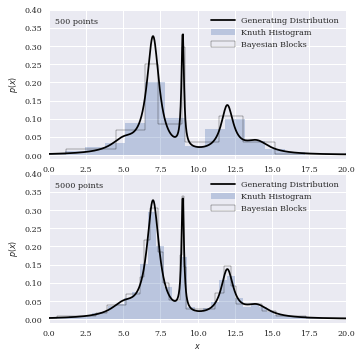

In [22]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

from astroML.plotting import hist

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Generate our data: a mix of several Cauchy distributions
np.random.seed(0)
N = 10000
mu_gamma_f = [(5, 1.0, 0.1),
              (7, 0.5, 0.5),
              (9, 0.1, 0.1),
              (12, 0.5, 0.2),
              (14, 1.0, 0.1)]
true_pdf = lambda x: sum([f * stats.cauchy(mu, gamma).pdf(x)
                          for (mu, gamma, f) in mu_gamma_f])
x = np.concatenate([stats.cauchy(mu, gamma).rvs(int(f * N))
                    for (mu, gamma, f) in mu_gamma_f])
np.random.shuffle(x)
x = x[x > -10]
x = x[x < 30]

#------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(bottom=0.08, top=0.95, right=0.95, hspace=0.1)
N_values = (500, 5000)
subplots = (211, 212)

for N, subplot in zip(N_values, subplots):
    ax = fig.add_subplot(subplot)
    xN = x[:N]
    t = np.linspace(-10, 30, 1000)

    # plot the results
    ax.plot(xN, -0.005 * np.ones(len(xN)), '|k')
    hist(xN, bins='knuth', ax=ax, normed=True,
         histtype='stepfilled', alpha=0.3,
         label='Knuth Histogram')
    hist(xN, bins='blocks', ax=ax, normed=True,
         histtype='step', color='k',
         label="Bayesian Blocks")
    ax.plot(t, true_pdf(t), '-', color='black',
            label="Generating Distribution")

    # label the plot
    ax.text(0.02, 0.95, "%i points" % N, ha='left', va='top',
            transform=ax.transAxes)
    ax.set_ylabel('$p(x)$')
    ax.legend(loc='upper right', prop=dict(size=8))

    if subplot == 212:
        ax.set_xlabel('$x$')

    ax.set_xlim(0, 20)
    ax.set_ylim(-0.01, 0.4001)

plt.show()

In figure above, We compare a Bayesian block segmentation of a data set to a segmentation using Knuth's rule. The adpaptive bin width of Baysian blocks histogram leads to a better representation of the underlying data, especially when there are fewer points in the data set. An important feature of this method is that the bins are optimal in quantitative sense, meaning that statistical significance can be attached to the bin configuration. This leads to some applications in time-domain astronomy, especially in signal detection. 


### Next lecture: Numerical Methods for Complex Problems (MCMC)